In [22]:
#%matplotlib notebook
%matplotlib inline

# Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import os
import gmaps
from config import gkey

# Configure gmaps

gmaps.configure(api_key=gkey)

In [23]:
# Find path

Currentpath = os.getcwd()
Currentpath

'/Users/sarahmanning/Project'

In [65]:
# Read CSV 2016 and 2017 CMS Enrollement file

Rawfile2017 = pd.read_csv("Medicare2017Enrollment.csv") 
Rawfile2016 = pd.read_csv('Medicare2016Enrollment.csv')
Rawfile2018 = pd.read_csv('Medicare2018Enrollment.csv')
Rawfile2015 = pd.read_csv('Medicare2015Enrollment.csv')
Rawfile2014 = pd.read_csv('Medicare2014Enrollment.csv')


In [66]:
New_2017 = Rawfile2017[['FIPS State County Code', 'State', 'County', 'Enrollment']]
New_2016 = Rawfile2016[['FIPS State County Code', 'State', 'County', 'Enrollment']]
New_2018 = Rawfile2018[['FIPS State County Code', 'State', 'County', 'Enrollment']]
New_2015 = Rawfile2015[['FIPS State County Code', 'State', 'County', 'Enrollment']]
New_2014 = Rawfile2014[['FIPS State County Code', 'State', 'County', 'Enrollment']]


In [67]:
# Clean Enrollement Dataframe. Remove '*' and Nan

New_CMS2017 = New_2017.dropna(how='any')
New_CMS2017 = New_CMS2017[Rawfile2017.Enrollment!= '*']
New_CMS2017['Enrollment'] = pd.to_numeric(New_CMS2017['Enrollment'])
New_CMS2017 = New_CMS2017.rename(columns = {'State': 'StateAbbrev'
                                ,'FIPS State County Code': 'FIPS'})

New_CMS2016 = New_2016.dropna(how='any')
New_CMS2016 = New_CMS2016[Rawfile2016.Enrollment!= '*']
New_CMS2016['Enrollment'] = pd.to_numeric(New_CMS2016['Enrollment'])
New_CMS2016 = New_CMS2016.rename(columns = {'State': 'StateAbbrev'
                                ,'FIPS State County Code': 'FIPS'})

New_CMS2018 = New_2018.dropna(how='any')
New_CMS2018 = New_CMS2018[Rawfile2018.Enrollment!= '*']
New_CMS2018['Enrollment'] = pd.to_numeric(New_CMS2018['Enrollment'])
New_CMS2018 = New_CMS2018.rename(columns = {'State': 'StateAbbrev'
                                ,'FIPS State County Code': 'FIPS'})

New_CMS2015 = New_2015.dropna(how='any')
New_CMS2015 = New_CMS2015[Rawfile2015.Enrollment!= '*']
New_CMS2015['Enrollment'] = pd.to_numeric(New_CMS2015['Enrollment'])
New_CMS2015 = New_CMS2015.rename(columns = {'State': 'StateAbbrev'
                                ,'FIPS State County Code': 'FIPS'})

New_CMS2014= New_2014.dropna(how='any')
New_CMS2014= New_CMS2014[Rawfile2014.Enrollment!= '*']
New_CMS2014['Enrollment'] = pd.to_numeric(New_CMS2014['Enrollment'])
New_CMS2014 = New_CMS2014.rename(columns = {'State': 'StateAbbrev'
                                ,'FIPS State County Code': 'FIPS'})




/Users/sarahmanning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/sarahmanning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/sarahmanning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Users/sarahmanning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/sarahmanning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [68]:
# Groupy state and county

Cms_Enrollment_2017 = New_CMS2017.groupby(['FIPS', 'StateAbbrev', 'County'])
Final2017CMS = pd.DataFrame(Cms_Enrollment_2017["Enrollment"].sum())

Cms_Enrollment_2016 = New_CMS2016.groupby(['FIPS', 'StateAbbrev', 'County'])
Final2016CMS = pd.DataFrame(Cms_Enrollment_2016["Enrollment"].sum())

Cms_Enrollment_2018 = New_CMS2018.groupby(['FIPS', 'StateAbbrev', 'County'])
Final2018CMS = pd.DataFrame(Cms_Enrollment_2018["Enrollment"].sum())

Cms_Enrollment_2015 = New_CMS2015.groupby(['FIPS', 'StateAbbrev', 'County'])
Final2015CMS = pd.DataFrame(Cms_Enrollment_2015["Enrollment"].sum())

Cms_Enrollment_2014 = New_CMS2014.groupby(['FIPS', 'StateAbbrev', 'County'])
Final2014CMS = pd.DataFrame(Cms_Enrollment_2014["Enrollment"].sum())


# Put Cms_Enrollment in pd = Nick

In [69]:
# Read CSV population file

RawPopulation2017 = pd.read_csv("Population_Data.csv",encoding='iso-8859-1') 
RawPopulation2017.head()


,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,1,1,Alabama,Autauga County,1,0,54571,26569,28002,...,607,538,57,48,26,32,9,11,19,10
1,50,1,1,Alabama,Autauga County,1,1,3579,1866,1713,...,77,56,9,5,4,1,0,0,2,1
2,50,1,1,Alabama,Autauga County,1,2,3991,2001,1990,...,64,66,2,3,2,7,2,3,2,0
3,50,1,1,Alabama,Autauga County,1,3,4290,2171,2119,...,51,57,13,7,5,5,2,1,1,1
4,50,1,1,Alabama,Autauga County,1,4,4290,2213,2077,...,48,44,7,5,0,2,2,1,3,1


In [70]:
# Create New Dataframe

Population2017 = RawPopulation2017[['STNAME', 'CTYNAME', 'YEAR', 'AGEGRP','TOT_POP', 'TOT_MALE', 'TOT_FEMALE']]
Population2017 = Population2017.rename(columns = {'STNAME': 'State'
                                ,'CTYNAME': 'County'})
Population2017.head()

,State,County,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE
0,Alabama,Autauga County,1,0,54571,26569,28002
1,Alabama,Autauga County,1,1,3579,1866,1713
2,Alabama,Autauga County,1,2,3991,2001,1990
3,Alabama,Autauga County,1,3,4290,2171,2119
4,Alabama,Autauga County,1,4,4290,2213,2077


In [71]:
CountyStateMap = pd.read_csv("CountyStateMap.csv") 
CountyStateMap = CountyStateMap.rename(columns = {'CountyName':'County',
                                                  'StateName': 'State'})
CountyStateMap.head()

,FIPS,State,StateAbbrev,County,ShortCounty
0,1001.0,Alabama,AL,Autauga County,Autauga
1,1003.0,Alabama,AL,Baldwin County,Baldwin
2,1005.0,Alabama,AL,Barbour County,Barbour
3,1007.0,Alabama,AL,Bibb County,Bibb
4,1009.0,Alabama,AL,Blount County,Blount


In [72]:
#HEAT or Utlization

HeatMap = pd.merge(Final2017CMS,CountyStateMap, on=['FIPS', 'StateAbbrev', 'County'], how='inner')
HeatMap.head()

,FIPS,StateAbbrev,County,Enrollment,State,ShortCounty
0,11001.0,DC,District of Columbia,53890,District of Columbia,District of Columbia
1,32510.0,NV,Carson City,8070,Nevada,Carson City
2,72001.0,PR,Adjuntas,2565,Puerto Rico,Adjuntas
3,72003.0,PR,Aguada,7141,Puerto Rico,Aguada
4,72005.0,PR,Aguadilla,10420,Puerto Rico,Aguadilla


In [ ]:
#SM: Pull in 14, 15, 18 use a line chart to highlight 5 largest state trend


#YOUNES

CombinedCMS1617 = pd.merge(Final2017CMS,Final2016CMS, on=['FIPS', 'StateAbbrev', 'County'], how='inner',suffixes=('_2017', '_2016'))

CombinedCMS161718 = pd.merge(CombinedCMS1617, Final2018CMS, on=['FIPS', 'StateAbbrev', 'County'], how='inner')
CombinedCMS15161718 = pd.merge(CombinedCMS161718, Final2015CMS, on=['FIPS', 'StateAbbrev', 'County'], how='inner')
CombinedCMS1415161718 = pd.merge(CombinedCMS15161718, Final2014CMS, on=['FIPS', 'StateAbbrev', 'County'], how='inner')


CombinedCMS1415161718 = CombinedCMS1415161718.rename(columns = {'Enrollment_x':'Enrollment_2018',
                                                  'Enrollment_y':'Enrollment_2015',
                                                  'Enrollment':'Enrollment_2014'}) 

CombinedCMS1415161718.head()

#CombinedCMS1415161718top= CombinedCMS1415161718[CombinedCMS1415161718.StateAbbrev == ('CA', 'NY', 'TX', 'FL', 'PA')]

In [74]:
PopulationFips = pd.merge(Population2017,CountyStateMap, on=['State', 'County'], how='inner')
PopulationFips.head()
                                                      

,State,County,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,FIPS,StateAbbrev,ShortCounty
0,Alabama,Autauga County,1,0,54571,26569,28002,1001.0,AL,Autauga
1,Alabama,Autauga County,1,1,3579,1866,1713,1001.0,AL,Autauga
2,Alabama,Autauga County,1,2,3991,2001,1990,1001.0,AL,Autauga
3,Alabama,Autauga County,1,3,4290,2171,2119,1001.0,AL,Autauga
4,Alabama,Autauga County,1,4,4290,2213,2077,1001.0,AL,Autauga


In [13]:
PopvMed = pd.merge(Final2017CMS, PopulationFips, on=['FIPS','StateAbbrev'], how='inner')
PopvMed = PopvMed[PopvMed.AGEGRP == 0]
PopvMed = PopvMed[PopvMed.YEAR == 10]
PopvMed = PopvMed[['FIPS','StateAbbrev','State','County','ShortCounty','Enrollment','TOT_POP']] 
#PopvMed['perc'] = PopvMed['Enrollment']/PopvMed['TOT_POP'] * 100

PopvMed.head()


,FIPS,StateAbbrev,State,County,ShortCounty,Enrollment,TOT_POP
171,1001.0,AL,Alabama,Autauga County,Autauga,4622,55443
380,1003.0,AL,Alabama,Baldwin County,Baldwin,19807,212619
589,1005.0,AL,Alabama,Barbour County,Barbour,1736,25158
798,1007.0,AL,Alabama,Bibb County,Bibb,2206,22555
1007,1009.0,AL,Alabama,Blount County,Blount,6101,57827


In [14]:
PopvMedState = PopvMed.groupby(['State'])
PopvMedStateBar = pd.DataFrame(PopvMedState['Enrollment','TOT_POP'].sum())
PopvMedStateBar['percent'] = PopvMedStateBar['Enrollment']/PopvMedStateBar['TOT_POP'] * 100

PopvMedStateBarNEW = PopvMedStateBar[['percent']]
PopvMedStateBarNEW.head()

,percent
State,
Alabama,7.092584
Alaska,0.181251
Arizona,6.444361
Arkansas,2.774704
California,6.138245


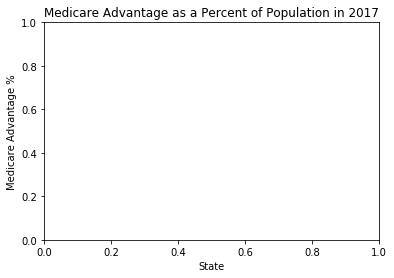

In [18]:
#x = PopvMedState['State']
#y = PopvMedStateBar['perc']

PopvMedStateBarNEW = PopvMedStateBarNEW.plot(kind='bar', align='center', figsize=(15,7))

plt.title('Medicare Advantage as a Percent of Population in 2017')
plt.xlabel('State')
plt.ylabel('Medicare Advantage %')



#plt.savefig('MedvPop.png')

plt.show()

Medicare Part C (Medicare Advantage Plans)
Most Alaskans will not have access to a Medicare Advantage plan, as they are not currently available in our state. If you already have a Medicare Advantage plan or are unsure if you do, kindly have any health insurance cards ready and call us. You can also compare Medicare plan options at

In [16]:
What states use the medicare most?
# heat map of 2017 enrollment -- hold
# med as percent of population - good
# utlization as percent of enrollment? -- goal

Who is more likely?
# med as percent of population in low pop areas vs high pop areas: thresholds? - nick
# income level comapred to med enrollment - jeff
# correlation between larger areas (regression?)
# male vs female?

Is it increasing?
# visualizaton of change year over year (maybe adding 2018 as well?) -younes 
# is population changing with medicare - trend in total medicare and total population




Object `most` not found.
Object `likely` not found.
Object `increasing` not found.


In [17]:
# Medicare vs Population (by state and by county)
# Attach FIPS dict = Sarah
# Compare 2016 and 2017 medicare enrollment
# Compare 2016 Medicare to inpatient data
# Compare Medicare enrollment in county to income (Use Census data) (higher medicare enrollement in count = higher income??)

